### Group members:
**Cuiting Zhong(cz6425), Wenying Hu(wh7893), Xueru Rong(xr677), Lining Jiang(lj8823), Tianxin Huang(th29885), Rulan Pan(rp33973)**

In [1]:
import pandas as pd
train=pd.read_csv('train.csv')

In [2]:
train.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [3]:
col_A=[i for i in train.columns if 'A_' in i]
col_A

for i in col_A:
    #new cols A_B_s: A-B
    train['A_B'+i[1:]]=train[i]-train['B'+i[1:]]
    #new cols A/B_s: A/B
    train['A/B'+i[1:]]=train[i]/train['B'+i[1:]]

In [4]:
train.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3',
       'A_B_follower_count', 'A/B_follower_count', 'A_B_following_count',
       'A/B_following_count', 'A_B_listed_count', 'A/B_listed_count',
       'A_B_mentions_received', 'A/B_mentions_received',
       'A_B_retweets_received', 'A/B_retweets_received', 'A_B_mentions_sent',
       'A/B_mentions_sent', 'A_B_retweets_sent', 'A/B_retweets_sent',
       'A_B_posts', 'A/B_posts', 'A_B_network_feature_1',
       'A/B_network_feature_1', 'A_B_network_feature_2',
       'A/B_network_feature_2',

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

y=train['Choice']

# A-B
col1=[i for i in train.columns if 'A_B_' in i]
X1=train[col1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.33, random_state=0)
clf1 = LogisticRegression(random_state=0, penalty='l1').fit(X1_train, y1_train)
y1_pred = clf1.predict(X1_test)
confusion_matrix(y1_test, y1_pred)

# A/B
#col2=[i for i in train.columns if 'A/B_' in i]
#X2=train[col2]
#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.33, random_state=0)
#clf2 = LogisticRegression(random_state=0, penalty='l1').fit(X2_train, y2_train)
#y2_pred = clf2.predict(X2_test)
#confusion_matrix(y2_test, y2_pred)

array([[631, 267],
       [206, 711]], dtype=int64)

In [6]:
confusion_matrix(y1_test, y1_pred)

array([[631, 267],
       [206, 711]], dtype=int64)

In [7]:
clf1.coef_

array([[-1.60344957e-07,  1.26338446e-06,  1.06501541e-04,
        -9.48829481e-06, -1.34248896e-04,  9.05471424e-03,
         1.04958987e-01,  3.10184894e-03,  4.06768152e-05,
         9.54479370e-04,  3.10004725e-05]])

In [8]:
# A-B
col1=[i for i in train.columns if 'A_B_' in i]
X1=train[col1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.33, random_state=0)
clf2 = LogisticRegression(random_state=0).fit(X1_train, y1_train)
y2_pred = clf2.predict(X1_test)
confusion_matrix(y1_test, y2_pred)

array([[659, 239],
       [228, 689]], dtype=int64)

In [9]:
clf2.coef_

array([[-1.90723477e-07,  9.73714826e-07,  1.15221286e-04,
        -2.58325774e-06, -1.63757824e-04,  5.72494465e-06,
         1.08964669e-06,  8.47917777e-06,  4.33540904e-05,
         1.98167183e-05,  4.03185132e-05]])

## Backward Selection

In [10]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from itertools import compress
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector_backward = RFE(estimator, 5, step=1)
selector_backward = selector_backward.fit(X1_train, y1_train)
print('three most significant factors by using backward feature selection are: ',list(compress(col1, selector_backward.support_)))

three most significant factors by using backward feature selection are:  ['A_B_listed_count', 'A_B_mentions_sent', 'A_B_retweets_sent', 'A_B_posts', 'A_B_network_feature_2']


## Lasso Regression & feature selections

In [11]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state = 0)
lasso_alphas =  10**np.linspace(10,-6,100)*0.5          
tuned_parameters = [{'alpha':lasso_alphas}]
n_folds = 5

lasso_clf = GridSearchCV(lasso, tuned_parameters,cv=n_folds, refit = True)
lasso_clf.fit(X1_train, y1_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([5.00000e+09, 3.44631e+09, ..., 7.25414e-07, 5.00000e-07])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [12]:
lasso_clf.best_estimator_

Lasso(alpha=0.0008536763237353443, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
lasso_best = Lasso(alpha =0.0008536763237353443)
lasso_best.fit(X1_train, y1_train)
pd.Series(lasso_best.coef_, index = X1_train.columns).sort_values(ascending=False)

A_B_retweets_sent        1.669723e-02
A_B_mentions_sent        2.508630e-03
A_B_posts                7.099635e-04
A_B_network_feature_2    1.866309e-04
A_B_listed_count         1.222583e-05
A_B_network_feature_1    7.792974e-06
A_B_network_feature_3    6.623664e-06
A_B_following_count      1.886075e-07
A_B_follower_count      -3.732727e-08
A_B_mentions_received   -3.472345e-06
A_B_retweets_received   -1.694961e-05
dtype: float64

In [14]:
lasso_pred = lasso_best.predict(X1_test)
lasso_result = pd.DataFrame(lasso_pred)
lasso_result.columns = ['raw_score']
lasso_result['result'] = lasso_result['raw_score'].map(lambda x: 1 if x >=0.5 else 0)
confusion_matrix(y1_test, lasso_result['result'])

array([[614, 284],
       [211, 706]], dtype=int64)

## Tree feature selections

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X1_train, y1_train)
importance = pd.Series(clf.feature_importances_, index = X1_train.columns).sort_values(ascending=False)
importance

A_B_listed_count         0.333692
A_B_retweets_received    0.095434
A_B_network_feature_2    0.089685
A_B_follower_count       0.077522
A_B_following_count      0.076634
A_B_network_feature_3    0.062726
A_B_mentions_sent        0.060313
A_B_retweets_sent        0.059967
A_B_posts                0.056709
A_B_mentions_received    0.054979
A_B_network_feature_1    0.032340
dtype: float64

In [16]:
tree_pred = clf.predict(X1_test)
confusion_matrix(y1_test, tree_pred)

array([[596, 302],
       [288, 629]], dtype=int64)

In [17]:
importance[:5].index

Index(['A_B_listed_count', 'A_B_retweets_received', 'A_B_network_feature_2',
       'A_B_follower_count', 'A_B_following_count'],
      dtype='object')

## Logistic regression with subset of features

In [18]:
col2=['A_B_listed_count', 'A_B_retweets_received', 'A_B_following_count','A_B_network_feature_2', 'A_B_follower_count']
X2=train[col2]
X2_train, X2_test, y1_train, y1_test = train_test_split(X2, y, test_size=0.33, random_state=0)
clf2 = LogisticRegression(random_state=0, penalty='l1').fit(X2_train, y1_train)
y2_pred = clf2.predict(X2_test)
confusion_matrix(y1_test, y2_pred)

array([[592, 306],
       [195, 722]], dtype=int64)

## Problem 1 part2

In [20]:
train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,A_B_retweets_sent,A/B_retweets_sent,A_B_posts,A/B_posts,A_B_network_feature_1,A/B_network_feature_1,A_B_network_feature_2,A/B_network_feature_2,A_B_network_feature_3,A/B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,-0.231920,0.302336,-6.626665,0.051819,-64,0.030303,90.969697,2.204413,9438.106061,5.923645
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,0.546816,1.968943,4.106299,4.836513,206,2.263804,-113.587704,0.139687,-1601.149290,0.453815
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,0.490702,5.882446,2.986516,5.951102,92,31.666667,58.594502,6.670436,5722.563574,21.634244
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,-7.067053,0.014022,-29.271279,0.088176,-1756,0.003405,-21.469296,0.085218,-1299.678967,0.068895
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,2.213765,2.977058,19.298035,5.229015,466,6.482353,78.904293,2.626893,840.220036,1.421453


In [21]:
col1=[i for i in train.columns if 'A_B_' in i]
X1=train[col1]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.33, random_state=0)
clf1 = LogisticRegression(random_state=0, penalty='l1').fit(X1_train, y1_train)
y1_pred = clf1.predict(X1_test)
confusion_matrix(y1_test, y1_pred)

array([[631, 267],
       [206, 711]], dtype=int64)

In [22]:
new_train = train[train.index.isin(X1_test.index.tolist())]

In [23]:
new_pred = pd.DataFrame(y1_pred, index = X1_test.index)
new_pred.columns = ['prediction']

In [24]:
new_train2 = pd.merge(new_train, new_pred, left_index=True, right_index=True)
new_train2 = new_train2[["Choice","A_follower_count","B_follower_count","prediction"]]
confusion_matrix(new_train2["Choice"], new_train2["prediction"])

array([[631, 267],
       [206, 711]], dtype=int64)

In [25]:
new_train2["A_follower_unit"] = new_train2["A_follower_count"] * 0.0001
new_train2["B_follower_unit"] = new_train2["B_follower_count"] * 0.0001

In [26]:
new_train2.head()

,Choice,A_follower_count,B_follower_count,prediction,A_follower_unit,B_follower_unit
1,0,21591,39262,0,2.1591,3.9262
4,1,45589,7554,1,4.5589,0.7554
9,0,182598,117913,0,18.2598,11.7913
12,1,23230,750,0,2.3230,0.0750
14,1,2088,4511,0,0.2088,0.4511


In [27]:
total_sale_old = new_train2[new_train2["Choice"] ==1]["A_follower_unit"].sum() + new_train2[new_train2["Choice"] ==0]["B_follower_unit"].sum()
total_revenue = total_sale_old * 10
total_cost = len(new_train2) * 10
total_profit = total_revenue - total_cost

In [28]:
print("total sales without model:", total_sale_old)
print ("total_revenue is:", total_revenue)
print ("total_cost is:", total_cost)
print ("total_profit is:", total_profit)

total sales without model: 166922.31660000002
total_revenue is: 1669223.1660000002
total_cost is: 18150
total_profit is: 1651073.1660000002


In [29]:
new_train2["A_follower_unit_new"] = new_train2["A_follower_count"] * 0.00015
new_train2["B_follower_unit_new"] = new_train2["B_follower_count"] * 0.00015

In [30]:
total_sale_new =new_train2[new_train2["Choice"] ==1][new_train2["prediction"] == 1]["A_follower_unit_new"].sum() + new_train2[new_train2["Choice"] ==0][new_train2["prediction"] == 0]["B_follower_unit_new"].sum()
total_revenue_new = total_sale_new * 10
total_cost_new = len(new_train2) * 10
total_profit_new = total_revenue_new - total_cost_new

C:\Users\cuiti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [31]:
print("total sales with model:", total_sale_new)
print ("total_revenue is:", total_revenue_new)
print ("total_cost is:", total_cost_new)
print ("total_profit is:", total_profit_new)

total sales with model: 226414.52249999996
total_revenue is: 2264145.2249999996
total_cost is: 18150
total_profit is: 2245995.2249999996


In [32]:
lift = total_profit_new / total_profit
print ("lift is :",lift)

lift is : 1.3603244672925654


## lift for whole dataset

In [33]:
ytrain = clf1.predict(X1)

In [34]:
whole_pred = pd.DataFrame(ytrain, index = train.index)
whole_pred.columns = ['prediction']

In [35]:
whole_train = pd.merge(train, whole_pred, left_index=True, right_index=True)
whole_train = whole_train[["Choice","A_follower_count","B_follower_count","prediction"]]
confusion_matrix(whole_train["Choice"], whole_train["prediction"])

array([[1896,  802],
       [ 652, 2150]], dtype=int64)

In [36]:
whole_train["A_follower_unit"] = whole_train["A_follower_count"] * 0.0001
whole_train["B_follower_unit"] = whole_train["B_follower_count"] * 0.0001

In [37]:
whole_sale = whole_train[whole_train["Choice"] ==1]["A_follower_unit"].sum() + whole_train[whole_train["Choice"] ==0]["B_follower_unit"].sum()
whole_revenue = whole_sale * 10
whole_cost = len(train) * 10
whole_profit = whole_revenue - whole_cost

In [38]:
print("total sales without model:", whole_sale)
print ("total_revenue is:", whole_revenue)
print ("total_cost is:", whole_cost)
print ("total_profit is:", whole_profit)

total sales without model: 537656.8593
total_revenue is: 5376568.593
total_cost is: 55000
total_profit is: 5321568.593


In [39]:
whole_train["A_follower_unit_new"] = whole_train["A_follower_count"] * 0.00015
whole_train["B_follower_unit_new"] = whole_train["B_follower_count"] * 0.00015

In [40]:
whole_sale_new =whole_train[whole_train["Choice"] ==1][whole_train["prediction"] == 1]["A_follower_unit_new"].sum() + whole_train[whole_train["Choice"] ==0][whole_train["prediction"] == 0]["B_follower_unit_new"].sum()
whole_revenue_new = whole_sale_new * 10
whole_cost_new = len(train) * 10
whole_profit_new = whole_revenue_new - whole_cost_new

C:\Users\cuiti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [41]:
print("total sales with model:", whole_sale_new)
print ("total_revenue is:", whole_revenue_new)
print ("total_cost is:", whole_cost_new)
print ("total_profit is:", whole_profit_new)

total sales with model: 734246.7034499999
total_revenue is: 7342467.034499999
total_cost is: 55000
total_profit is: 7287467.034499999


In [42]:
whole_lift = whole_profit_new / whole_profit
print ("lift for whole dataset is :",whole_lift)

lift for whole dataset is : 1.36942085912149


## Lift with perfect model

In [ ]:
total_sale_perfect =new_train2[new_train2["Choice"] ==1]["A_follower_unit_new"].sum() + new_train2[new_train2["Choice"] ==0]["B_follower_unit_new"].sum()
total_revenue_perfect = total_sale_perfect * 10
total_cost_perfect = len(new_train2) * 10
total_profit_perfect = total_revenue_perfect - total_cost_perfect

In [ ]:
print("total sales with perfect model:", total_sale_perfect)
print ("total_revenue is:", total_revenue_perfect)
print ("total_cost is:", total_cost_perfect)
print ("total_profit is:", total_profit_perfect)

In [ ]:
lift_perfect = total_profit_perfect / total_profit
print ("lift with perfect model is :",lift_perfect)

##### The lift in expected net profit from using our analytic model is around 1.36. The lift in net profit from using a perfect analytic model is around 1.5. The calculation is shown above.

## Problem 2

### Twitter Scraping

In [1]:
#!/usr/bin/python2.7

#pip2.7 install --user oauth2
import oauth2 as oauth
import csv
from csv import writer
import json
import time
import urllib2 as urllib

api_key = "xaSyP6ErOdluosOSZja2keAX6"
api_secret = "RqRAryuFJa0M3BzNZPMpZcE9vX1eNlpSyElXzwQo5KoXx8s6c1"
access_token_key = "2657275194-taGtsHYQUq5oDQT63O3AR6BrRRnPtYepDeGqP76"
access_token_secret = "C44MQ09bbf3DLdeAVoh728RKb4Zn4PaafacZJ0vIsK1cU"


_debug=0

oauth_token    = oauth.Token(key=access_token_key, secret=access_token_secret)
oauth_consumer = oauth.Consumer(key=api_key, secret=api_secret)

signature_method_hmac_sha1 = oauth.SignatureMethod_HMAC_SHA1()

http_method = "GET"

http_handler  = urllib.HTTPHandler(debuglevel=_debug)
https_handler = urllib.HTTPSHandler(debuglevel=_debug)

In [2]:
'''
Construct, sign, and open a twitter request
using the hard-coded credentials above.
'''
def twitterreq(url, method, parameters):
    req = oauth.Request.from_consumer_and_token(oauth_consumer,
                                                token=oauth_token,
                                                http_method=http_method,
                                                http_url=url,
                                                parameters=parameters)
    req.sign_request(signature_method_hmac_sha1, oauth_consumer, oauth_token)
    headers = req.to_header()
    if http_method == "POST":
        encoded_post_data = req.to_postdata()
    else:
        encoded_post_data = None
        url = req.to_url()
    
    opener = urllib.OpenerDirector()
    opener.add_handler(http_handler)
    opener.add_handler(https_handler)
    
    response = opener.open(url, encoded_post_data)
    
    return response

In [ ]:
tweets_num=5000 
parameters = []
js=[]
for i in range(tweets_num/100):
    #keyword: datascience
    url = "https://api.twitter.com/1.1/search/tweets.json?q=datascience&lang=en&count=100&result_type=recent&max_id="+str(id_list[2*i])
    response = twitterreq(url, "GET", parameters)
    re_j=json.load(response)
    re_j=re_j['statuses']
    js.append(re_j)
    time.sleep(1)

ids=[]
screen_name=[]
followers=[]
listed=[]
retweet=[]
inreplyto=[]
favorite=[]
friends=[]
text=[]
location=[]

for tweets in js:
    for tweet in tweets:
        if tweet.get('user'):
            ids.append(tweet['user']['id'])
            retweet.append(tweet['retweet_count'])
            favorite.append(tweet['favorite_count'])
            inreplyto.append(tweet['in_reply_to_screen_name'])
            friends.append(tweet['user']['friends_count'])
            screen_name.append(tweet['user']['screen_name'])
            followers.append(tweet['user']['followers_count'])
            listed.append(tweet['user']['listed_count'])
            text.append(tweet['text'])
            location.append(tweet['user']['location'])
            
####################################################
import pandas as pd

col_name=['ids', 'screen_name', 'followers', 'retweet', 'inreplyto', 'favorite', 'friends', 'listed', 'location', 'text']
df=pd.DataFrame(list(zip(ids, screen_name, followers, retweet, inreplyto, favorite, friends, listed, location, text)), columns=col_name)
df.to_csv('tweets_final.csv', encoding = 'utf-8')

### Analysis

In [226]:
import pandas as pd
df=pd.read_csv('tweets_final.csv')

In [227]:
df.head()

,Unnamed: 0,ids,screen_name,followers,retweet,inreplyto,favorite,friends,listed,location,text
0,0,1009871088820482048,GoNorthStack,1303,18,NaN,0,2432,33,"Phoenix, AZ",RT @gp_pulipaka: Introduction to Deep Learning...
1,1,19794429,kirstennelson1,139,3,NaN,0,152,4,"San Jose, London, or Reno",RT @ripw5280: The #TFD18 delegates loved the #...
2,2,394290965,dqserv,268,5,NaN,0,33,32,Chennai,RT @gp_pulipaka: Data and Models Versioning fo...
3,3,113277969,GCPanel,32198,10,NaN,0,6974,271,USA,RT @FinMKTG: Visualizing the world's #populati...
4,4,394290965,dqserv,268,6,NaN,0,33,32,Chennai,RT @KirkDBorne: Gentle Introduction to Graph #...


In [12]:
import re

def rt(s):
    if 'RT @' in s:
        return re.findall('RT @\w+:',s)[0][3:-1]
    else:
        return None

def mentioned(s):
    if 'RT @' in s:
        l=len(re.findall('RT @\w+:',s)[0])
        s=s[l:]
        if '@' in s:
            return re.findall('@\w+', s)
    elif '@' in s:
        return re.findall('@\w+', s)
    else:
        return None

In [16]:
df_sub=df[['screen_name','text']]
df_sub['RT']=df_sub['text'].map(lambda s:rt(s))
df_sub['mentioned']=df_sub['text'].map(lambda s:mentioned(s))
df_sub['col1']='@'+df_sub['screen_name']
df_sub.head()

C:\Users\cuiti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cuiti\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\cuiti\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,screen_name,text,RT,mentioned,col1
0,GoNorthStack,RT @gp_pulipaka: Introduction to Deep Learning...,@gp_pulipaka,None,@GoNorthStack
1,kirstennelson1,RT @ripw5280: The #TFD18 delegates loved the #...,@ripw5280,[@sudiphore],@kirstennelson1
2,dqserv,RT @gp_pulipaka: Data and Models Versioning fo...,@gp_pulipaka,None,@dqserv
3,GCPanel,RT @FinMKTG: Visualizing the world's #populati...,@FinMKTG,"[@matthew_daniels, @puddingviz, @FrRonconi]",@GCPanel
4,dqserv,RT @KirkDBorne: Gentle Introduction to Graph #...,@KirkDBorne,None,@dqserv


In [17]:
df_sum_rt=df_sub[df_sub.RT.notna()][['col1','RT']]
df_sum_rt['col3']='RT'
df_sum_rt.columns=['col1','col2','col3']
df_sum_rt=df_sum_rt.reset_index(drop=True)

In [18]:
df_sum_tweet=df_sub[df_sub.RT.isna() & df_sub.mentioned.isna()][['col1']]
df_sum_tweet['col2']=df_sum_tweet['col1']
df_sum_tweet['col3']='Tweet'
df_sum_tweet=df_sum_tweet.reset_index(drop=True)

In [19]:
df_sub2=df_sub[df_sub.mentioned.notna()]
df_sub2['count']=df_sub2['mentioned'].map(lambda s:len(s))
df_sub2['col1_list']=df_sub2['col1'].map(lambda s:[s])
s1=df_sub2['col1_list']*df_sub2['count']
col1=pd.Series(s1.sum())
col2=pd.Series(df_sub2['mentioned'].sum())
df_sum_mentioned=pd.DataFrame(columns=['col1','col2','col3'])
df_sum_mentioned['col1']=col1
df_sum_mentioned['col2']=col2
df_sum_mentioned['col3']='mentioned'

C:\Users\cuiti\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\cuiti\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
df_sum=df_sum_tweet.append(df_sum_rt).append(df_sum_mentioned)
df_sum=df_sum.reset_index(drop=True)
df_sum

,col1,col2,col3
0,@gp_pulipaka,@gp_pulipaka,Tweet
1,@KirkDBorne,@KirkDBorne,Tweet
2,@DWKPhD,@DWKPhD,Tweet
3,@Claire_Harris82,@Claire_Harris82,Tweet
4,@couponfree01,@couponfree01,Tweet
5,@KirkDBorne,@KirkDBorne,Tweet
6,@danielbastos,@danielbastos,Tweet
7,@flosalim,@flosalim,Tweet
8,@gp_pulipaka,@gp_pulipaka,Tweet
9,@capillarytech,@capillarytech,Tweet


In [21]:
len(df_sum)
df_sum.to_csv('RT.csv')

7673

### Network Graph

In [91]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
rt = pd.read_csv('RT.csv') 
rt.head()

,Unnamed: 0,col1,col2,col3
0,0,@gp_pulipaka,@gp_pulipaka,Tweet
1,1,@KirkDBorne,@KirkDBorne,Tweet
2,2,@DWKPhD,@DWKPhD,Tweet
3,3,@Claire_Harris82,@Claire_Harris82,Tweet
4,4,@couponfree01,@couponfree01,Tweet


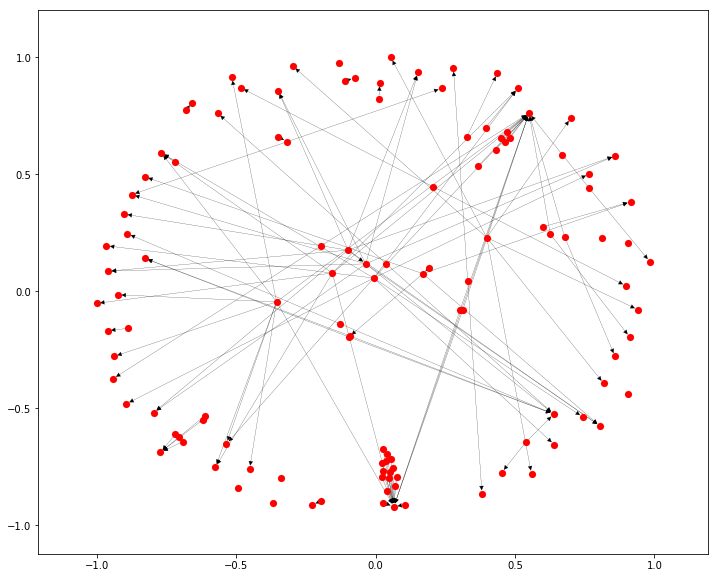

In [92]:
graph = nx.from_pandas_edgelist(rt, source = 'col1', target = 'col2', create_using = nx.DiGraph())
plt.figure(figsize = (12,10))
nx.draw_networkx(graph, node_size = 50, with_labels=False,cmap=True, linewidths = .1, width=0.2, font_size=8)
plt.show()

#### Calculatie degree, betweenness, closeness

In [93]:
degree=pd.Series(nx.degree_centrality(graph))
betweenness=pd.Series(nx.betweenness_centrality(graph))
closeness=pd.Series(nx.closeness_centrality(graph))
dbc=pd.DataFrame([degree, betweenness, closeness]).T
dbc.columns=['degree','betweenness','closeness']
#dbc.to_csv('dbc.csv', index=False)

### Score

From Part I, feature importance is as follow:  
A_B_listed_count: 0.333692  
A_B_retweets_received: 0.095434  
A_B_network_feature_2:  0.089685  
A_B_follower_count:  0.077522  
A_B_following_count:  0.076634  
A_B_network_feature_3: 0.062726  
A_B_mentions_sent:     0.060313  
A_B_retweets_sent:    0.059967  
A_B_posts: 0.056709  
A_B_mentions_received:  0.054979  
A_B_network_feature_1:  0.032340  

In [ ]:
a=[0.333692,0.095434, 0.089685, 0.077522, 0.062726]
b=sum(a)
[i/b for i in a]

**Let's define score= 0.5063*Lists_count + 0.1448 * #retweets + 0.1361 * betweenness + 0.1176 * #followers + 0.0952 * closeness**

In [80]:
col2_names=[s[1:] for s in rt['col2'].unique()]
col2_names

['gp_pulipaka',
 'KirkDBorne',
 'DWKPhD',
 'Claire_Harris82',
 'couponfree01',
 'danielbastos',
 'flosalim',
 'capillarytech',
 'RetweetedRajeev',
 'BrownsJoann',
 'rbukralia',
 'splunkanswers',
 'devvGeek',
 'ripw5280',
 'FinMKTG',
 '1MillionCupsRVA',
 'kimberl87759219',
 'RVAWorks',
 'nordicinst',
 'Fisher85M',
 'DalithSteiger',
 'MusicComposer1',
 'MikeQuindazzi',
 'ingliguori',
 'THEAdamGabriel',
 'Softnet_Search',
 'astonishminds',
 'PD_MobileApps',
 'notjasonmorris',
 'it_dept_sona',
 'ravishankar1730',
 'Rbloggers',
 'ThomasDavidson',
 'jblefevre60',
 'BigData_Joe',
 'clark_robotics',
 'Harry_Robots',
 'DeepLearn007',
 'sudiphore',
 'matthew_daniels',
 'puddingviz',
 'FrRonconi',
 'nodexl',
 'userexperienceu',
 'mikequindazzi',
 'fisher85m',
 'iainljbrown',
 'evankirstel',
 'kuri',
 'DataScienceCtrl',
 'mybodyo',
 'FT',
 'antgrasso',
 'akwyz',
 'enricomolinari',
 'v',
 'SASsoftware',
 'jbl',
 'jackcoleman219',
 'HarvardBiz',
 'alison_iot',
 'ravikikan',
 'physorg_com',
 'SpirosM

In [176]:
import re

data=data[['retweet','text']]
data['rt']=data['text'].map(lambda s:re.findall('@\w+',s))
data['rt_count']=data['rt'].map(lambda s:len(s))
data['l_retweet']=data['retweet'].map(lambda s:[s])

rt_name=data['rt'].sum()
rt_count=(data['l_retweet']*data['rt_count']).sum()
rt_name_count=pd.DataFrame([pd.Series(rt_name),pd.Series(rt_count)]).T
rt_name_count.columns=['name','#retweets']
s_rt=rt_name_count.groupby(['name'])['#retweets'].sum()/rt_name_count.groupby(['name'])['#retweets'].count()

C:\Users\cuiti\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\cuiti\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [178]:
pd.DataFrame(s_rt)

,#retweets
name,
@1MillionCupsRVA,1.833333
@BigData_Joe,2.000000
@BrettKing,1233.000000
@Claire_Harris82,1.230000
@DalithSteiger,7.000000
@DataScienceCtrl,21.000000
@DeepLearn007,1233.000000
@FT,109.000000
@FinMKTG,10.000000


#### Get the #followers and #lists_count for col2

In [ ]:
import tweepy
import csv
import pandas as pd

consumer_key = "RIvznkUMU7oCKcY7iqnFIRlY6"
consumer_secret = "vBYd83EGz1u3WLfBERTz1B5ke9V7MDOh7A2c3pTcpGFC8cIyzr"
access_token = "2219485208-BwUkCccEoNYaitvEZvutQvNSjYNqd3XLxFKt6sU"
access_token_secret = "tIUpDtcXQXhUNWOJgzo27SORT1oO4Nb0W3pJzcUvmG2Bx"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
n_followers=[]
n_list=[]
for user in col2_names:
    n_list.append(len(api.lists_all(screen_name=user)))
    n_followers.append(api.get_user(screen_name=user).followers_count)

In [99]:
df_68=pd.DataFrame([pd.Series(names),pd.Series(n_followers2),pd.Series(n_list)]).T
df_68.columns=['col2','#followers','#lists_count']
#df_68.to_csv('df_68.csv', index=False)

In [100]:
df_68['col2']='@'+df_68['col2']
dbc=dbc.reset_index()
dbc.columns=['col2','degree','betweenness','closeness']

In [211]:
df_merged=pd.merge(df_68, dbc, on='col2', how='inner')

In [212]:
df_merged=df_merged.set_index('col2')
df_merged['#retweets']=s_rt
df_merged=df_merged.dropna()

In [213]:
from sklearn import preprocessing
df_normalized=preprocessing.normalize(df_merged)
df_normalized=pd.DataFrame(df_normalized,index=df_merged.index, columns=df_merged.columns)

In [222]:
df_normalized['score']=0.5063*df_normalized['#lists_count']+ 0.1448 *df_normalized['#retweets'] + 0.1361 *df_normalized['betweenness'] + 0.1176 * df_normalized['#followers'] + 0.0952 * df_normalized['closeness']

In [223]:
df_normalized.sort_values(['score'],ascending=False).head(50)

,#followers,#lists_count,degree,betweenness,closeness,#retweets,score
col2,,,,,,,
@drlindekilde,0.775188,0.001025,4.305476e-06,0.000000e+00,4.305476e-06,0.631730,0.183156
@mybodyo,0.914659,0.019227,2.308172e-05,0.000000e+00,2.308172e-05,0.403768,0.175766
@jbl,0.175908,0.000000,2.842723e-05,0.000000e+00,2.842723e-05,0.984407,0.163232
@v,0.976990,0.000000,5.781688e-05,0.000000e+00,5.781688e-05,0.213286,0.145783
@it_dept_sona,0.991778,0.000000,2.688473e-04,0.000000e+00,2.688473e-04,0.127971,0.135189
@notjasonmorris,0.998414,0.006982,5.867159e-05,0.000000e+00,5.867159e-05,0.055855,0.129042
@sudiphore,0.999693,0.000000,6.942793e-05,0.000000e+00,6.942793e-05,0.024786,0.121159
@BrettKing,0.999783,0.000034,1.418389e-07,0.000000e+00,1.418389e-07,0.020812,0.120605
@SpirosMargaris,0.999848,0.000424,1.187977e-07,0.000000e+00,1.187977e-07,0.017431,0.120321


### Top50 influencer

In [225]:
list(df_normalized.sort_values(['score'],ascending=False).head(50).index)

['@drlindekilde',
 '@mybodyo',
 '@jbl',
 '@v',
 '@it_dept_sona',
 '@notjasonmorris',
 '@sudiphore',
 '@BrettKing',
 '@SpirosMargaris',
 '@JimMarous',
 '@ripw5280',
 '@userexperienceu',
 '@kuri',
 '@ipfconline1',
 '@DeepLearn007',
 '@RVAWorks',
 '@ravikikan',
 '@antgrasso',
 '@MusicComposer1',
 '@THEAdamGabriel',
 '@1MillionCupsRVA',
 '@enricomolinari',
 '@FrRonconi',
 '@ingliguori',
 '@ThomasDavidson',
 '@ravishankar1730',
 '@nodexl',
 '@SASsoftware',
 '@akwyz',
 '@matthew_daniels',
 '@jblefevre60',
 '@clark_robotics',
 '@PD_MobileApps',
 '@Fisher85M',
 '@Softnet_Search',
 '@MikeQuindazzi',
 '@Rbloggers',
 '@puddingviz',
 '@KirkDBorne',
 '@nordicinst',
 '@evankirstel',
 '@Harry_Robots',
 '@Claire_Harris82',
 '@kimberl87759219',
 '@FinMKTG',
 '@gp_pulipaka',
 '@DataScienceCtrl',
 '@fisher85m',
 '@astonishminds',
 '@splunkanswers']